
http://help.simplecv.org/question/228/gaze-tracking-possible/
http://www.diku.dk/hjemmesider/ansatte/panic/eyegaze/node9.html#SECTION00061000000000000000

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline

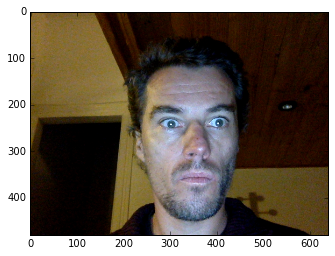

In [10]:
from LeCheapEyeTracker import Camera
cam = Camera()
frame = cam.run(T=1)
cam.close()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

FPS :  13.15862776382528


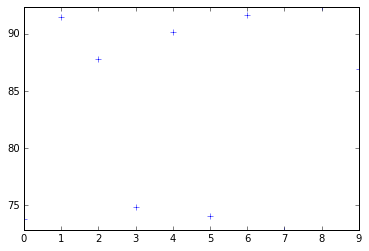

In [11]:
plt.plot(np.diff(np.array(cam.ctime))*1000, '+')
_ = plt.axis('tight')
print ('FPS : ',  cam.N/(cam.ctime[-1]-cam.ctime[0]))

(480, 640, 3) 0 255


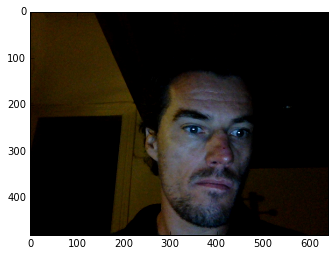

In [12]:
cam = Camera()
img = cam.grab()
img = cam.grab()
cam.close()
print(img.shape, img.min(), img.max())
import cv2
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

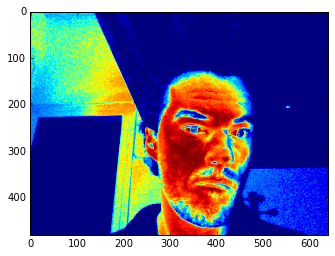

In [13]:
img_ = img.copy()
gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

plt.imshow(gray)

Parameters:	

        cascade – Haar classifier cascade (OpenCV 1.x API only). It can be loaded from XML or YAML file using Load(). When the cascade is not needed anymore, release it using cvReleaseHaarClassifierCascade(&cascade).
        image – Matrix of the type CV_8U containing an image where objects are detected.
        objects – Vector of rectangles where each rectangle contains the detected object.
        scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        flags – Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
        minSize – Minimum possible object size. Objects smaller than that are ignored.
        maxSize – Maximum possible object size. Objects larger than that are ignored.



164 86 54 54
62 78 58 58


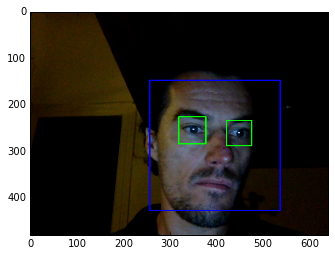

In [14]:
import cv2

face_cascade = cv2.CascadeClassifier('/Users/laurentperrinet/pool/libs/vision/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/laurentperrinet/pool/libs/vision/opencv/data/haarcascades/haarcascade_eye.xml')

img_ = img.copy()
faces = face_cascade.detectMultiScale(img_, 1.3, 5) # image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]
eyelist = []
for (x,y,w,h) in faces:
    img_ = cv2.rectangle(img_, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_color = img_[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color, 1.1, 5, 4)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
        eyelist.append(roi_color[ey:ey+eh, ex:ex+ew])
        print(ex,ey,ew,eh)
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))

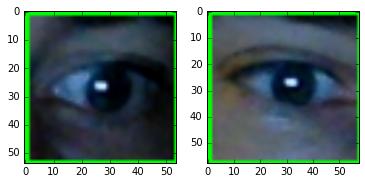

In [15]:
fig, axs = plt.subplots(1, len(eyelist))
for i, eye in enumerate(eyelist):
    axs[i].imshow(cv2.cvtColor(eye, cv2.COLOR_BGR2RGB))

##  segmenting the different parts

- the skin is all around
- the reflection is white and small
- the iris is round, darker
